In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

%matplotlib inline

In [2]:
N = 4*np.pi
x = np.linspace(-N, N, 1000)

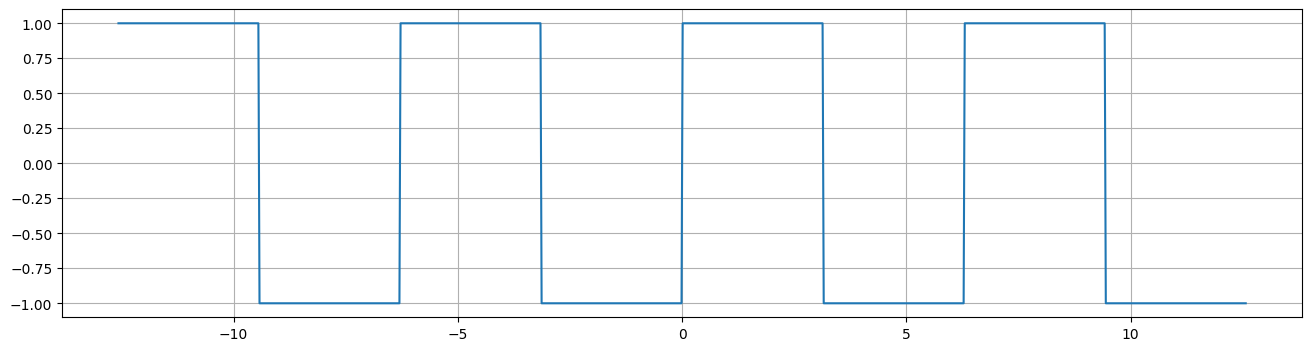

In [3]:
def square_wave(x):
    return np.sign(np.sin(x))

plt.figure(figsize=(16, 4))
plt.plot(x, square_wave(x))
plt.grid(True)
plt.show()

Fourier series coefficients:
<br>
$a_0 = \frac{1}{\pi}\int_0^{2\pi}f(x)dx$
<br>
$a_n = \frac{1}{\pi}\int_0^{2\pi}f(x)cos(nx)dx$
<br>
$b_n = \frac{1}{\pi}\int_0^{2\pi}f(x)sin(nx)dx$
<br>
<br>
$f(x) = \frac{a_0}{2} +\sum_{n=1}^\infty [a_n cos(nx) + b_n sin(nx)]$

In [4]:
def harmonic(n=1, a=0, b=1):
    def f(x):
        return a*np.cos(n*x) + b*np.sin(n*x)
    return f

def fourier(f, n=10):
    def integ(f):
        return integrate.quad(f, 0, 2*np.pi)

    a, b = np.zeros(n), np.zeros(n)
    a[0], _ = integ(f)

    for i in range(1, n):
        a[i], _ = integ(lambda x: f(x) * np.cos(x * i))
        b[i], _ = integ(lambda x: f(x) * np.sin(x * i))

    a /= np.pi
    b /= np.pi

    plt.figure(figsize=(16, 4))
    plt.grid(True)
    
    plt.plot(x, f(x))
    plt.plot(x, a[0]/2 + sum(harmonic(i, a[i], b[i])(x) for i in range(1, n)))

    plt.show()


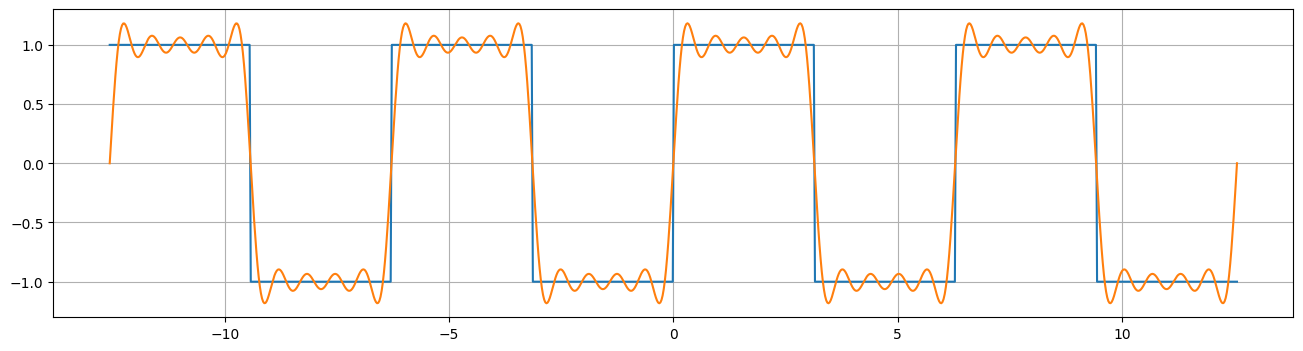

In [5]:
fourier(square_wave)

In [6]:
f = np.random.randint(1, 20, 50)
def random_wave(x):
    return sum(np.sin(i*x)+i for i in f)

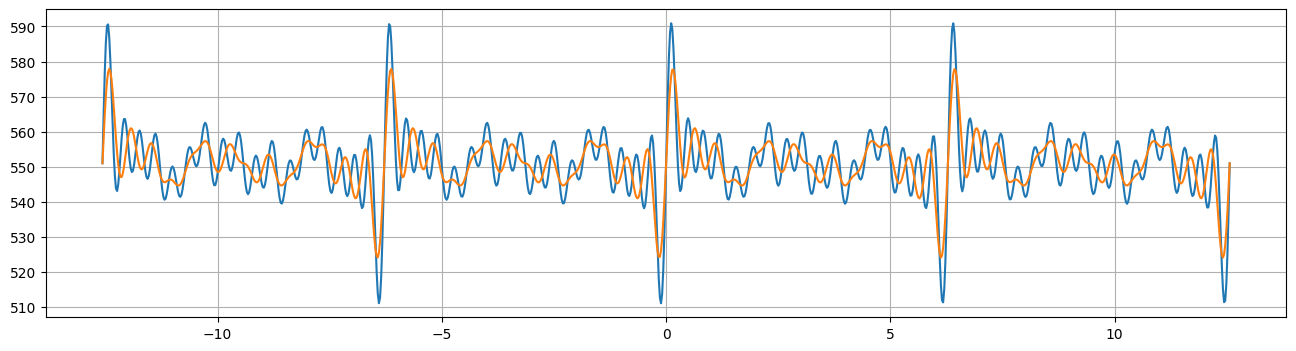

In [7]:
fourier(random_wave, 15)

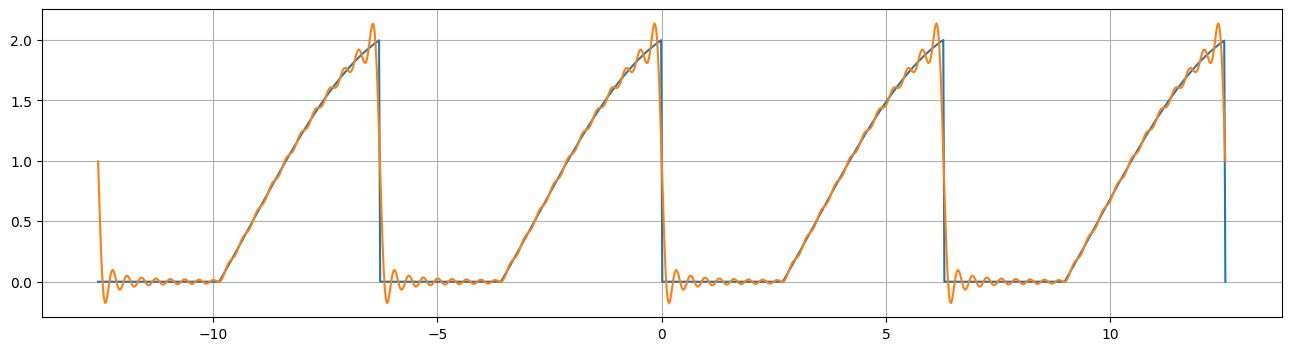

In [8]:
def pulse(x):
    x = x % (2 * np.pi) # this makes x always fall within the range [0, 2*pi]
    return np.maximum(1 - np.cos(x/2) - np.cos(x/4), 0)

fourier(pulse, 20)